# Decision Tree

#  1. Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as classifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 2. Loading Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Axelvel/DS50/main/Datasets/Datasets_Region_France_2016_2020.csv')

In [3]:
# load dataset
#data =data[data['Regions']=='Pays de la Loire']
# 12 Regions :
# Auvergne Rhone-Alpes - Bourgogne Franche-Comte - Bretagne - Centre Val de Loire - Grand Est - Hauts-de-France 
# Ile-de-France - Normandie - Nouvelle-Aquitaine - Occitanie - PACA - Pays de la Loire

#Les noms des colonnes
#Regions    Dates    Heures    Electricite    Gaz    Tmin    Tmax    Tmoy    Taux de Co2


In [4]:
data.replace(0,np.nan, inplace=True)
data.dropna(inplace=True)

In [5]:
data.head()

,Regions,Dates,Heures,Electricite,Gaz,Tmin,Tmax,Tmoy,Taux de Co2
0,Auvergne Rhone-Alpes,01/01/2016,00:00,8114.0,2226,2.96,10.56,6.76,31
1,Auvergne Rhone-Alpes,01/01/2016,00:30,8012.0,2227,2.96,10.56,6.76,31
2,Auvergne Rhone-Alpes,01/01/2016,01:00,7789.0,2205,2.96,10.56,6.76,32
3,Auvergne Rhone-Alpes,01/01/2016,01:30,7749.0,2212,2.96,10.56,6.76,32
4,Auvergne Rhone-Alpes,01/01/2016,02:00,7724.0,2209,2.96,10.56,6.76,32


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051724 entries, 0 to 1052351
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Regions      1051724 non-null  object 
 1   Dates        1051724 non-null  object 
 2   Heures       1051724 non-null  object 
 3   Electricite  1051724 non-null  float64
 4   Gaz          1051724 non-null  int64  
 5   Tmin         1051724 non-null  float64
 6   Tmax         1051724 non-null  float64
 7   Tmoy         1051724 non-null  float64
 8   Taux de Co2  1051724 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 80.2+ MB


# 3. Create label encoder instance

In [7]:
lb = LabelEncoder() 

# Create Numerical labels for classes
data['Regions'] = lb.fit_transform(data['Regions'] ) 
data['Dates'] = lb.fit_transform(data['Dates']) 
data['Heures'] = lb.fit_transform(data['Heures'] )

In [8]:
#Display of dataset after encoding 
data.head()

,Regions,Dates,Heures,Electricite,Gaz,Tmin,Tmax,Tmoy,Taux de Co2
0,0,0,0,8114.0,2226,2.96,10.56,6.76,31
1,0,0,2,8012.0,2227,2.96,10.56,6.76,31
2,0,0,4,7789.0,2205,2.96,10.56,6.76,32
3,0,0,6,7749.0,2212,2.96,10.56,6.76,32
4,0,0,8,7724.0,2209,2.96,10.56,6.76,32


# Encoder par catégorie l'électricité

In [9]:
# Valeur maximum de la consommation d'électricité sur la plage sélectionnée
max_elec = max(data['Electricite'])
print('Max électricité : ', max_elec)

# Valeur minimum de la consommation d'électricité sur la plage sélectionnée
min_elec = min(data['Electricite'])
print('Min électricité : ', min_elec)

# Plage de donnée de la consommation d'électricité sur la plage sélectionnée
ecart = max_elec - min_elec
print('Plage de donnée : ', ecart)

Max électricité :  15338.0
Min électricité :  175.0
Plage de donnée :  15163.0


In [10]:
bins = np.arange(0, 14000, 1000)
bins = np.append(bins, float("inf"))
labels = np.arange(1,15,1)
data_elec = pd.cut(data['Electricite'], bins=bins, labels=labels)
print(bins)
print(labels)

[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000.    inf]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


#  Encoder par catégorie le gaz

In [11]:
# Valeur maximum de la consommation d'électricité sur la plage sélectionnée
max_gaz = max(data['Gaz'])
print('Max électricité : ', max_gaz)

# Valeur minimum de la consommation d'électricité sur la plage sélectionnée
min_gaz = min(data['Gaz'])
print('Min électricité : ', min_gaz)

# Plage de donnée de la consommation d'électricité sur la plage sélectionnée
ecart = max_gaz - min_gaz
print('Plage de donnée : ', ecart)

Max électricité :  9700
Min électricité :  234
Plage de donnée :  9466


In [12]:
bins = np.arange(0, 10000, 1000)
bins = np.append(bins, float("inf"))
labels = np.arange(1, 11, 1)
data_gaz = pd.cut(data['Gaz'], bins=bins, labels=labels)
print(bins)
print(labels)

[   0. 1000. 2000. 3000. 4000. 5000. 6000. 7000. 8000. 9000.   inf]
[ 1  2  3  4  5  6  7  8  9 10]


<AxesSubplot:>

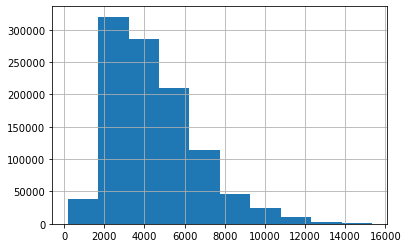

In [13]:
data['Electricite'].hist()

<AxesSubplot:>

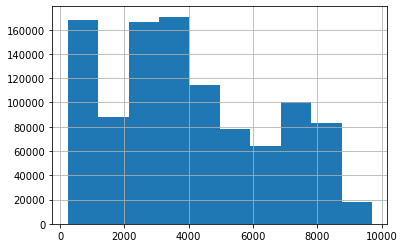

In [14]:
data['Gaz'].hist()

# 4. Construction du modèle et calcul des variables comparatives


# Cas A : calculs pour l'électrcité en prenant en paramètre le gaz

In [15]:
#split dataset in features and target variable

feature_cols = ['Regions','Dates', 'Heures', 'Gaz','Tmin', 'Tmoy','Taux de Co2']
Xe = data[feature_cols] # Features  
ye = data_elec # Target variable

In [16]:
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Xe, ye, test_size=0.2, random_state = 42) # 80% training and 20% test

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0,criterion='gini')

# Train Decision Tree Classifer
%time clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
pred_test =clf.predict(X_test)
pred_train = clf.predict(X_train)


Wall time: 4.76 s


In [18]:
predictions = clf.predict(X_test)

# Calcul de la valeur absolue de l'erreur
errors = abs(predictions - y_test.astype(np.int8))

print('Moyenne des erreurs :', round(np.mean(errors), 2), 'degrés')

Moyenne des erreurs : 0.14 degrés


In [19]:
#Evaluating Model

# Model Accuracy, how often is the classifier correct?

print('Accuracy Score on train data: ',accuracy_score(y_train, pred_train))
print('Accuracy Score on test data: ', accuracy_score(y_test,pred_test ))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.8624069980270508


In [20]:
clf.feature_importances_

array([0.26527598, 0.07392744, 0.16512548, 0.16252991, 0.07453962,
       0.18533281, 0.07326877])

# Cas B : calculs pour l'électrcité en ne prenant pas en paramètre le gaz

In [21]:
#split dataset in features and target variable

feature_cols = ['Regions','Dates', 'Heures', 'Tmin', 'Tmoy','Taux de Co2']
Xe = data[feature_cols] # Features  
ye = data_elec # Target variable

In [22]:

## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Xe, ye, test_size=0.3) # 80% training and 20% test

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
%time clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
pred_test =clf.predict(X_test)
pred_train = clf.predict(X_train)


Wall time: 3.09 s


In [24]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [25]:
X_test

,Regions,Dates,Heures,Tmin,Tmoy,Taux de Co2
343177,3,1534,50,16.70,21.56,18
871354,9,344,20,16.43,20.29,30
702571,8,1200,86,0.39,5.13,67
969137,11,135,34,4.15,11.35,32
516683,5,989,22,12.94,17.12,40
...,...,...,...,...,...,...
544766,6,1261,28,-5.38,-0.18,72
742699,8,322,86,11.42,18.19,12
846434,9,318,4,6.76,9.13,27
502948,5,283,8,10.30,14.27,39


In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
%time clf = clf.fit(X_train,y_train)

pred_test =clf.predict(X_test)

Wall time: 871 ms


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_test, labels = [4,5])

array([[39082,  4300],
       [26570, 13467]], dtype=int64)

In [28]:
clf.feature_importances_

array([0.72627555, 0.        , 0.01102726, 0.        , 0.26269719,
       0.        ])

In [29]:
features_names = Xe.columns
features_names

Index(['Regions', 'Dates', 'Heures', 'Tmin', 'Tmoy', 'Taux de Co2'], dtype='object')

In [30]:
feature_importance =pd.DataFrame(clf.feature_importances_,
              index = features_names, 
              columns = ["Importance for electricity"]).sort_values("Importance for electricity", ascending = False)

feature_importance

,Importance for electricity
Regions,0.726276
Tmoy,0.262697
Heures,0.011027
Dates,0.000000
Tmin,0.000000
Taux de Co2,0.000000


In [31]:
predictions = clf.predict(X_test)

# Calcul de la valeur absolue de l'erreur
errors = abs(predictions - y_test.astype(np.int8))
print('Moyenne des erreurs :', round(np.mean(errors), 2), 'degrés')

Moyenne des erreurs : 0.66 degrés


In [32]:
#Evaluating Model

# Model Accuracy, how often is the classifier correct?
print('Accuracy Score on train data: ',accuracy_score(y_train, pred_train))
print('Accuracy Score on test data: ', accuracy_score(y_test,pred_test ))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.4613587814324381


# Cas C : calculs pour le gaz en prenant en paramètre l'électricité

In [33]:
#split dataset in features and target variable

feature_cols = ['Regions','Dates', 'Heures','Electricite', 'Tmin', 'Tmax','Tmoy','Taux de Co2']

Xg = data[feature_cols] # Features  
yg = data_gaz # Target variable

In [34]:
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.2, random_state = 42) # 80% training and 20% test

In [35]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0,criterion='gini')

# Train Decision Tree Classifer
%time clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
pred_test =clf.predict(X_test)
pred_train = clf.predict(X_train)


Wall time: 5.15 s


In [36]:
predictions = clf.predict(X_test)

# Calcul de la valeur absolue de l'erreur
errors = abs(predictions - y_test.astype(np.int8))
print('Moyenne des erreurs :', round(np.mean(errors), 2), 'degrés')

Moyenne des erreurs : 0.05 degrés


In [37]:
#Evaluating Model

# Model Accuracy, how often is the classifier correct?
print('Accuracy Score on train data: ',accuracy_score(y_train, pred_train))
print('Accuracy Score on test data: ', accuracy_score(y_test,pred_test ))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9622239653901923


# Cas D : calculs pour le gaz en ne prenant pas en paramètre l'électricité

In [38]:
#split dataset in features and target variable

feature_cols = ['Regions','Dates', 'Heures', 'Tmin', 'Tmax','Tmoy','Taux de Co2']

Xg = data[feature_cols] # Features  
yg = data_gaz # Target variable

In [39]:
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.2, random_state = 42) # 80% training and 20% test

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0,criterion='gini')

# Train Decision Tree Classifer
%time clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
pred_test =clf.predict(X_test)
pred_train = clf.predict(X_train)


Wall time: 3.83 s


In [41]:
predictions = clf.predict(X_test)

# Calcul de la valeur absolue de l'erreur
errors = abs(predictions - y_test.astype(np.int8))
print('Moyenne des erreurs :', round(np.mean(errors), 2), 'degrés')

Moyenne des erreurs : 0.04 degrés


In [42]:
#Evaluating Model

# Model Accuracy, how often is the classifier correct?
print('Accuracy Score on train data: ',accuracy_score(y_train, pred_train))
print('Accuracy Score on test data: ', accuracy_score(y_test,pred_test ))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9696783855095201


In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_test)
cm


array([[29411,   182,    81,    36,     8,     1,     0,     0,     0,
            0],
       [  252, 18321,   280,    69,    26,     9,     2,     1,     0,
            0],
       [   75,   223, 32186,   432,    74,    22,    17,     6,     0,
            0],
       [   39,    77,   429, 35095,   370,    59,    27,    14,     1,
            0],
       [   10,    25,    69,   398, 23294,   409,    47,    23,     8,
            0],
       [    1,    15,    44,    51,   326, 15350,   249,    42,    12,
            0],
       [    0,     3,    16,    21,    46,   230, 13102,   339,    15,
            0],
       [    0,     0,    18,    19,    30,    34,   310, 21455,   302,
            6],
       [    0,     0,     0,     3,     3,     8,    23,   316, 14028,
           37],
       [    0,     0,     0,     0,     0,     0,     0,     2,    56,
         1725]], dtype=int64)

# 5. Interprétation des résultats

# A. Features Importances Electricité

In [44]:
data_region = data.Regions
data_date = data.Dates
data_heure = data.Heures
data_electricite = data.Electricite
data_gaz = data.Gaz
data_Tmin = data.Tmin
data_Tmoy = data.Tmoy
data_Tmax = data.Tmax
data_CO2 = data['Taux de Co2']

# Encoder des varibles non numériques : Régions, Dates et Heures
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()

encoded_region = labelEncoder.fit_transform(data_region)
encoded_date = labelEncoder.fit_transform(data_date)
encoded_heure = labelEncoder.fit_transform(data_heure)

In [45]:
bins = np.arange(0, 14000, 1000)
bins = np.append(bins, float("inf"))
labels = np.arange(1, 15, 1)
data_electricite = pd.cut(data['Electricite'], bins=bins, labels=labels)
print(bins)
print(labels)

[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000.    inf]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [46]:
features = [list(i) for i in zip (encoded_region, encoded_date, encoded_heure, data_gaz, data_Tmin, data_Tmoy, data_Tmax, data_CO2)]
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features,data_electricite, test_size=0.2, random_state = 4) # 80% training and 20% test


In [47]:
clf = classifier(random_state=0,min_samples_leaf=50,max_depth=30)

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=50, random_state=0)

In [48]:
clf.feature_importances_

array([0.38997382, 0.02815   , 0.15172506, 0.13993665, 0.02861984,
       0.11952547, 0.10901867, 0.03305048])

In [49]:
features_names =  ['Regions','Dates', 'Heures','Gaz', 'Tmin', 'Tmax','Tmoy','Taux de Co2']
features_names

['Regions', 'Dates', 'Heures', 'Gaz', 'Tmin', 'Tmax', 'Tmoy', 'Taux de Co2']

In [50]:
pd.DataFrame(clf.feature_importances_,
             index = features_names,
              columns = ["Importance for electricity"]).sort_values("Importance for electricity", ascending = False)

,Importance for electricity
Regions,0.389974
Heures,0.151725
Gaz,0.139937
Tmax,0.119525
Tmoy,0.109019
Taux de Co2,0.033050
Tmin,0.028620
Dates,0.028150


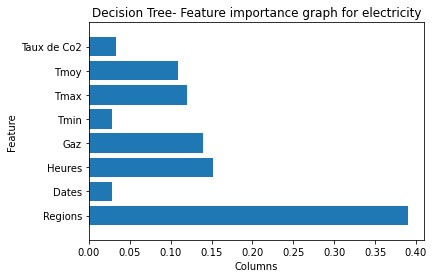

In [51]:
def plot_feature_importance(model):
  n_feature = len(features_names)
  plt.barh(np.arange(n_feature), clf.feature_importances_)
  plt.yticks(np.arange(n_feature), features_names)
  plt.title('Decision Tree- Feature importance graph for electricity')
  plt.xlabel("Columns")
  plt.ylabel("Feature")
  plt.ylim(-1, n_feature)

plot_feature_importance(clf)

# B. Features Importances Gaz

In [52]:
## Split dataset into training set and test set
features = [list(i) for i in zip (encoded_region, encoded_date, encoded_heure, data_electricite, data_Tmin, data_Tmoy, data_Tmax, data_CO2)]
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features,data_gaz, test_size=0.2, random_state = 4) # 80% training and 20% test


In [53]:
clf = classifier(random_state=0,min_samples_leaf=50,max_depth=30)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=50, random_state=0)

In [54]:
clf.feature_importances_

array([5.01533574e-05, 3.63643540e-01, 4.35208776e-01, 5.75909886e-05,
       7.37516071e-03, 1.00959573e-02, 1.04383214e-02, 1.73130500e-01])

In [55]:
features_names =  ['Regions','Dates', 'Heures','Electricite', 'Tmin', 'Tmax','Tmoy','Taux de Co2']
features_names

['Regions',
 'Dates',
 'Heures',
 'Electricite',
 'Tmin',
 'Tmax',
 'Tmoy',
 'Taux de Co2']

In [56]:
pd.DataFrame(clf.feature_importances_,
             index = features_names,
              columns = ["Importance for electricity"]).sort_values("Importance for electricity", ascending = False)

,Importance for electricity
Heures,0.435209
Dates,0.363644
Taux de Co2,0.173130
Tmoy,0.010438
Tmax,0.010096
Tmin,0.007375
Electricite,0.000058
Regions,0.000050


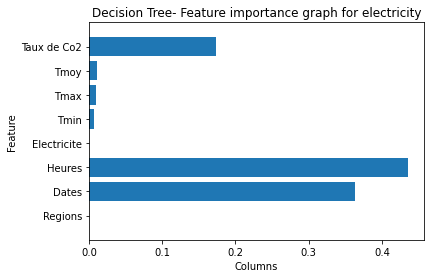

In [57]:
def plot_feature_importance(model):
  n_feature = len(features_names)
  plt.barh(np.arange(n_feature), clf.feature_importances_)
  plt.yticks(np.arange(n_feature), features_names)
  plt.title('Decision Tree- Feature importance graph for electricity')
  plt.xlabel("Columns")
  plt.ylabel("Feature")
  plt.ylim(-1, n_feature)

plot_feature_importance(clf)

In [58]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

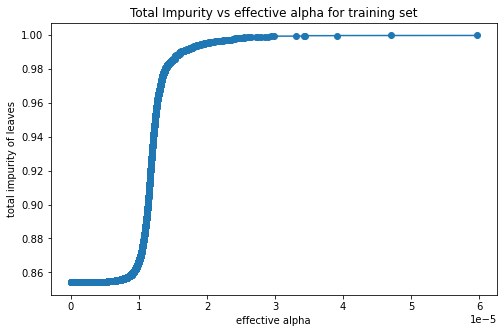

In [59]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

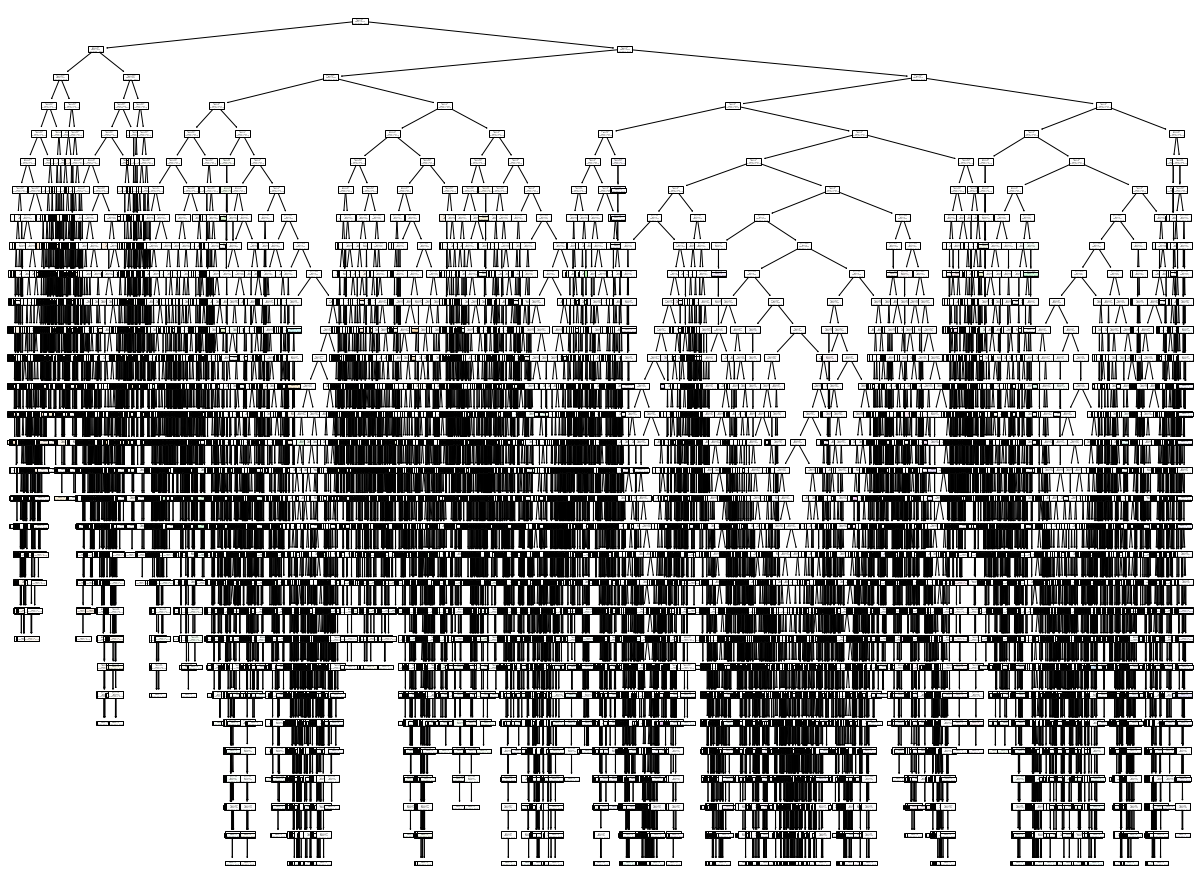

In [61]:
from sklearn import tree
plt.figure(figsize=(21,16))
tree.plot_tree(clf,filled=True)
plt.show()